In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\assignment data\insurance.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='charges'>

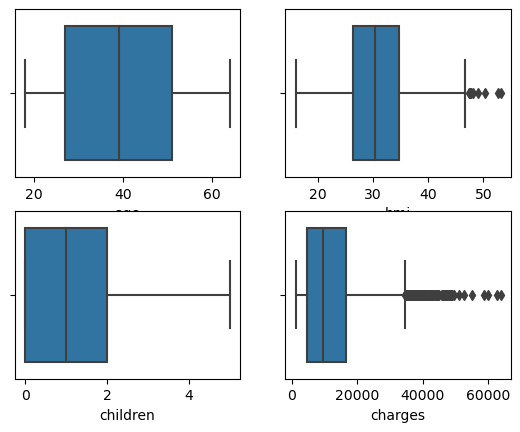

In [19]:
## finding the outlayers 

plt.subplot(221)
sns.boxplot(df.age)
plt.subplot(222)
sns.boxplot(df.bmi)
plt.subplot(223)
sns.boxplot(df.children)
plt.subplot(224)
sns.boxplot(df.charges)

## data cleaning  

In [22]:
# removing the put layers

q1,q2,q3 = df.bmi.quantile([0.25,0.5,0.75])
iqr  = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
df = df[df.bmi.between(ll,ul)]

In [23]:
q1,q2,q3 = df.children.quantile([0.25,0.5,0.75])
iqr  = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
df = df[df.children.between(ll,ul)]

In [24]:
q1,q2,q3 = df.charges.quantile([0.25,0.5,0.75])
iqr  = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr
df = df[df.charges.between(ll,ul)]

In [25]:
df.to_csv(r'C:\assignment data\insurance_cleaned.csv')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'barplot across the gender and avg of charges'}, xlabel='sex', ylabel='charges'>

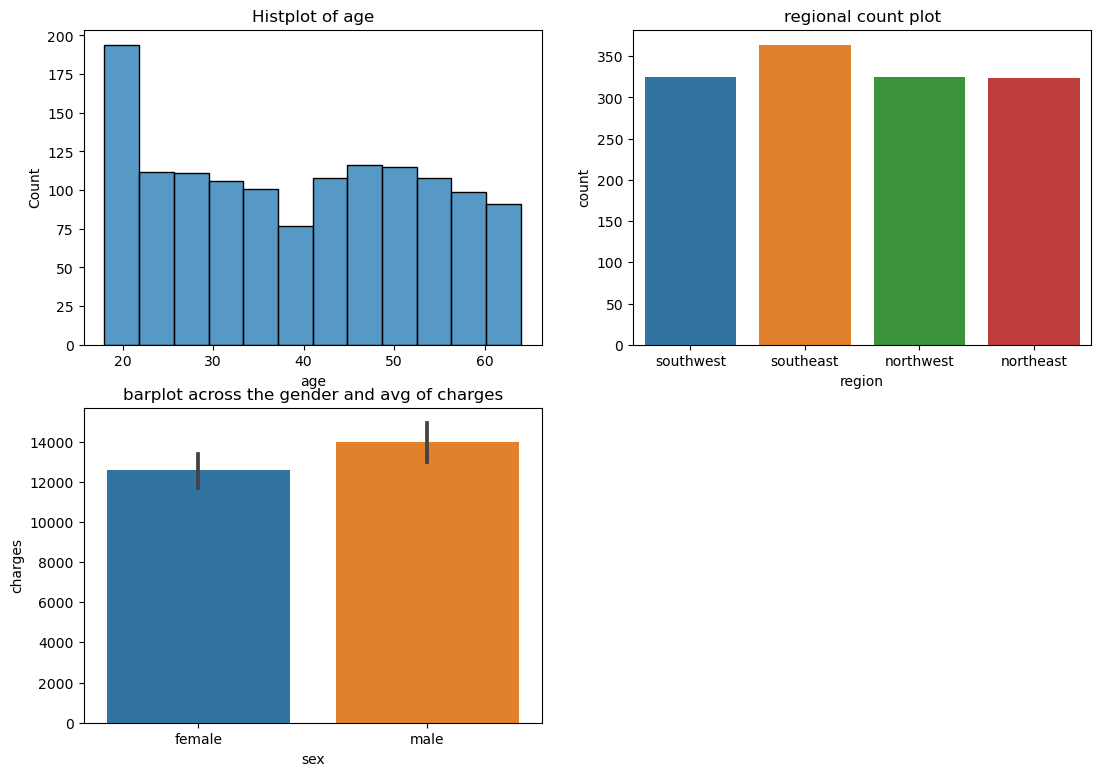

In [17]:
plt.figure(figsize=(13,9))
plt.subplot(221)
plt.title('Histplot of age')
sns.histplot(df.age)
plt.subplot(222)
plt.title('regional count plot')
sns.countplot(df.region)
plt.subplot(223)
plt.title('barplot across the gender and avg of charges')
sns.barplot(x = df.sex,y = df.charges,estimator=np.mean)



## data analysis conclusion 

- highest taking loans in age of 20-25,
- southeast region people are taking high loans compared to other region
- males are paying more charges compared to females 
 
 

### splitting the data 

In [55]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df.charges
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(784, 6) (336, 6)
(784,) (336,)


# Transforming the data

In [56]:
# separating the nuemerical and categorical datatypes
X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(include= ['int64','float64'])
## transforming the nuemerical datatypes
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_num_trans = pd.DataFrame(scalar.fit_transform(X_train_num),
                                columns=X_train_num.columns,
                                index = X_train_num.index)
X_train_num_trans.shape

(784, 3)

In [57]:
# transforming the categorical datatypes using onehot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop= 'first',sparse = False)
X_train_cat_trans = pd.DataFrame(encoder.fit_transform(X_train_cat),
                                columns=encoder.get_feature_names_out(X_train_cat.columns),
                                index = X_train_cat.index)
X_train_cat_trans.shape

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(784, 5)

In [58]:
X_train_trans = pd.concat([X_train_num_trans,X_train_cat_trans],axis = 1)

In [59]:
# separating the nuemerical and categorical datatypes

X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include= ['int64','float64'])

## transforming the nuemerical datatypes

X_test_num_trans = pd.DataFrame(scalar.transform(X_test_num),
                                columns=X_test_num.columns,
                                index = X_test_num.index)
# transforming the categorical datatypes using onehot encoding

X_test_cat_trans = pd.DataFrame(encoder.transform(X_test_cat),
                                columns=encoder.get_feature_names_out(X_test_cat.columns),
                                index = X_test_cat.index)
X_test_trans = pd.concat([X_test_num_trans,X_test_cat_trans],axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

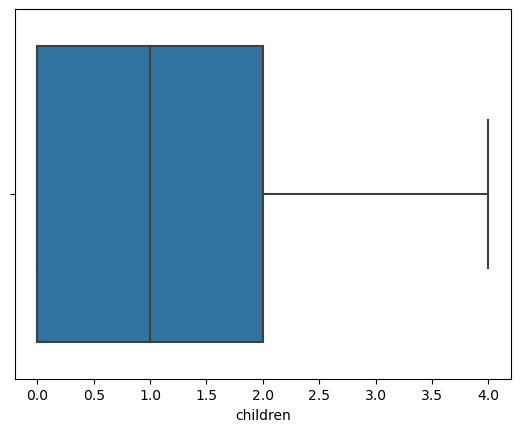

## Training

In [63]:
# trining the data using LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
#

In [64]:
# predicting the score
y_test_pre = regressor.predict(X_test_trans)
pd.DataFrame({'data':y_test,'data1':y_test_pre})

,data,data1
27,12268.63225,12146.053213
1132,20709.02034,12534.527603
1020,8798.59300,9765.468342
305,19442.35350,5760.862137
986,8410.04685,9366.966239
...,...,...
1038,2250.83520,4115.381962
604,17468.98390,15489.543926
347,8334.45755,10232.835335
1149,5979.73100,7601.295005


In [65]:
metrics.mean_absolute_error(y_test,y_test_pre)

1711.3569512982644

In [66]:
# trining the data using KNeighborsRegressor 

from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)  # score prediction

2432.5817957892855

In [67]:
# trining the data using DecisionTreeRegressor 

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)  # score prediction

2344.0863269910715

In [68]:
# trining the data using RandomForestRegressor 

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)  # score prediction

1846.7551315073713

In [69]:
# trining the data using support vector regressor 

from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)  # score prediction

4701.358775191182

In [70]:
# trining the data using GradientBoostingRegressor 

from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)   # score prediction

1691.1152913689377

### conclusion

`**gradient boosting regressor**`  **is the bestmodel for the medical dataset**